### 数值稳定性

#### 概念

* 数值稳定性常见问题
    * 梯度爆炸
    * 梯度消失
* 梯度爆炸：使用ReLU时常发生
    * 值超出值域：对于16位浮点数尤为严重 (GPU 上常用16位浮点数，运算能够快一些)
    * 对学习率敏感
        * 如果学习率太大 -> 大参数值 -> 更大的梯度
        * 学习率太小 -> 训练无进展
        * 可能需要在训练过程不断调整学习率
* 梯度消失：使用Sigmoid常发生
    * 梯度值変成0：对16位浮点数尤为严重
    * 不管如何选择学习率，训练没有进展
    * 对于底部层尤为严重：对于深层次网络，仅仅顶部层训练的较好，即仅能无法让神经网络更深

#### 总结

* 当数值过大或者过小时会导致数值问题
* 常发生在深度模型中，因为其会对$n$个数累乘

In [10]:
import torch
from matplotlib import pyplot as plt
from d2l import torch as d2l
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

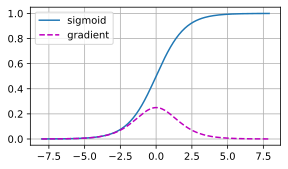

In [11]:
# 梯度消失
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))
plt.show()

In [4]:
# 梯度爆炸
M = torch.normal(0, 1, size=(4, 4))
print('一个矩阵 \n', M)
for i in range(100):
    M = torch.mm(M, torch.normal(0, 1, size=(4, 4)))

print('乘以100个矩阵后\n', M)

一个矩阵 
 tensor([[ 0.2308,  0.3393, -2.1572, -0.5688],
        [-0.1343,  2.0035,  0.5968, -0.2298],
        [-2.2660, -0.2172,  1.7027,  0.1273],
        [ 0.6773,  0.3744,  0.1083, -0.5970]])
乘以100个矩阵后
 tensor([[-8.1612e+22,  7.3080e+21,  4.6181e+22, -7.1021e+21],
        [ 8.4770e+22, -7.5908e+21, -4.7968e+22,  7.3769e+21],
        [ 5.9014e+23, -5.2845e+22, -3.3394e+23,  5.1356e+22],
        [-1.9949e+23,  1.7863e+22,  1.1288e+23, -1.7360e+22]])


### 模型初始化与激活函数

#### 解决梯度爆炸与梯度消失

* 目标：让梯度值在合理的范围内
* 方案
    * 将乘法变加法：Resnet,LSTM
    * 归一化：梯度归一化，梯度裁剪
    * 合理的权重初始和激活函数：将每层的输出和梯度都看做随机变量，让它们的**均值和方差都保持一致**

#### 权重初始化

* 权重初始化
    * 在合理值区间里随机初始参数
    * 训练开始的时候更容易有数值不稳定
        * 远离最优解的地方损失函数表面可能很复杂
        * 最优解附近表面会比较平
    * 使用$N(0,0.01)$来初始可能对小网络没问题，但不能保证在深度神经网络上的效果

#### 激活函数

* 直接使用ReLU、tanh问题都不会太大
* 使用sigmoid时，可以使用4*sigmoid-2代替原本的sigmoid